In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#create Spark session
spark = SparkSession.builder.appName('eda').getOrCreate()


In [3]:
df = spark.read.csv("/user/shengyan/project/air.csv",inferSchema=True, header=True )

### Data Overview

In [4]:
df.show(10)


+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|1987|   10|        14|        3|  741.0|       730|  912.0|       849|           PS|     1451

In [5]:
df.summary()

DataFrame[summary: string, Year: string, Month: string, DayofMonth: string, DayOfWeek: string, DepTime: string, CRSDepTime: string, ArrTime: string, CRSArrTime: string, UniqueCarrier: string, FlightNum: string, TailNum: string, ActualElapsedTime: string, CRSElapsedTime: string, AirTime: string, ArrDelay: string, DepDelay: string, Origin: string, Dest: string, Distance: string, TaxiIn: string, TaxiOut: string, Cancelled: string, CancellationCode: string, Diverted: string, CarrierDelay: string, WeatherDelay: string, NASDelay: string, SecurityDelay: string, LateAircraftDelay: string]

In [6]:
df.dtypes


[('Year', 'int'),
 ('Month', 'int'),
 ('DayofMonth', 'int'),
 ('DayOfWeek', 'int'),
 ('DepTime', 'double'),
 ('CRSDepTime', 'int'),
 ('ArrTime', 'double'),
 ('CRSArrTime', 'int'),
 ('UniqueCarrier', 'string'),
 ('FlightNum', 'int'),
 ('TailNum', 'string'),
 ('ActualElapsedTime', 'double'),
 ('CRSElapsedTime', 'double'),
 ('AirTime', 'double'),
 ('ArrDelay', 'double'),
 ('DepDelay', 'string'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'double'),
 ('TaxiIn', 'double'),
 ('TaxiOut', 'double'),
 ('Cancelled', 'double'),
 ('CancellationCode', 'string'),
 ('Diverted', 'double'),
 ('CarrierDelay', 'double'),
 ('WeatherDelay', 'double'),
 ('NASDelay', 'double'),
 ('SecurityDelay', 'double'),
 ('LateAircraftDelay', 'double')]

### Data Manipulation

In [7]:
df2=df.filter(F.col("Origin").cast("int").isNull())

In [8]:
df2.groupby("Origin").count().sort("count").orderBy(["count"], ascending=[0]).show(100)


+------+-------+
|Origin|  count|
+------+-------+
|   ORD|6598724|
|   ATL|6100880|
|   DFW|5711959|
|   LAX|4089229|
|   PHX|3491232|
|   DEN|3320115|
|   DTW|2979146|
|   IAH|2884647|
|   MSP|2754884|
|   SFO|2734052|
|   STL|2709179|
|   EWR|2706895|
|   LAS|2630917|
|   CLT|2546154|
|   LGA|2296746|
|   BOS|2291010|
|   PHL|2165067|
|   PIT|2072518|
|   SLC|2003182|
|   SEA|1983870|
|   MCO|1967351|
|   CVG|1923279|
|   DCA|1832692|
|   BWI|1717311|
|   SAN|1546648|
|   MIA|1448340|
|   CLE|1415858|
|   IAD|1336890|
|   JFK|1327863|
|   TPA|1321595|
|   MEM|1206781|
|   HOU|1205835|
|   BNA|1175095|
|   MCI|1174398|
|   MDW|1170329|
|   OAK|1160765|
|   SJC|1108090|
|   PDX|1054643|
|   RDU|1036676|
|   FLL|1013176|
|   MSY| 955329|
|   DAL| 952359|
|   IND| 824800|
|   SNA| 822058|
|   SMF| 813826|
|   SAT| 809777|
|   AUS| 803545|
|   ONT| 774645|
|   ABQ| 760298|
|   CMH| 759315|
|   BDL| 650889|
|   BUR| 580987|
|   PBI| 532339|
|   JAX| 520304|
|   ELP| 513665|
|   HNL| 51080

In [9]:
df2=df2.filter(F.col("Dest").cast("int").isNull())

In [10]:
df2.groupby("Dest").count().sort("count").orderBy(["count"], ascending=[1]).show(100)


+----+-----+
|Dest|count|
+----+-----+
| BFI|    1|
| CBM|    1|
| LBF|    1|
| RCA|    1|
| SKA|    1|
| LAR|    2|
| MKC|    2|
| GLH|    2|
| BFF|    2|
| FMN|    5|
| CKB|    6|
| PIR|    9|
| PVU|   11|
| CYS|   12|
| OGD|   19|
| RDR|   35|
| FOE|   57|
| MAZ|   84|
| MIB|   89|
| MTH|  127|
| BJI|  202|
| MKK|  288|
| INL|  290|
| LNY|  290|
| SOP|  317|
| MKG|  392|
| RHI|  444|
| KSM|  464|
| ANI|  472|
| OTH|  517|
| LMT|  567|
| ADK|  589|
| CMX|  628|
| TEX|  683|
| YAP|  692|
| HKY|  696|
| PLN|  775|
| ILG|  828|
| SLE|  880|
| RKS|  953|
| GCC| 1046|
| ROW| 1199|
| EWN| 1392|
| ALO| 1568|
| RFD| 1582|
| WYS| 1617|
| TTN| 1671|
| LWB| 1692|
| GST| 1787|
| ACK| 1825|
| HHH| 1833|
| YKM| 1846|
| ROP| 1919|
| VIS| 1982|
| TUP| 1983|
| EAU| 2113|
| ROR| 2368|
| VCT| 2434|
| LWS| 2753|
| PSE| 2929|
| TVL| 3306|
| PMD| 3352|
| EFD| 3646|
| SCK| 3664|
| CDC| 3878|
| APF| 3931|
| CCR| 4421|
| DLG| 4650|
| UCA| 4689|
| FLO| 5011|
| DUT| 5593|
| IPL| 5650|
| AKN| 5691|
| MQT| 5749|

In [11]:
#Find the number of missing values for each column
from pyspark.sql.functions import isnan, when, count, col
df2.select([count(when(df2[c].isNull(), c)).alias(c) for c in df2.columns]).show()


+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+--------+-----------------+--------------+--------+--------+--------+------+----+--------+--------+--------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum| TailNum|ActualElapsedTime|CRSElapsedTime| AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|  TaxiIn| TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+--------+-----------------+--------------+--------+--------+--------+------+----+--------+--------+--------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|   0|    0|         0|        0|2104357|         0|2384266|         0|        

In [12]:
# missing value percentage
from pyspark.sql.functions import *

amount_missing_df = df2.select([(count(when(isnan(c) | col(c).isNull(), c))/count(lit(1))).alias(c) for c in df2.columns])
# amount_missing_df.show()

In [13]:
df3 = df2.drop('CRSDepTime', 'CRSArrTime', 'CRSElapsedTime','TailNum', 'UniqueCarrier')

In [14]:
df3 = df3.dropna(subset=('DepTime','ArrTime','ActualElapsedTime','ArrDelay','Distance'))

In [15]:
import pandas as pd

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
amount_missing_df = df3.select([(count(when(isnan(c) | col(c).isNull(), c))/count(lit(1))).alias(c) for c in df3.columns])
amount_missing_df.toPandas()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305006,0.0,0.0,0.0,0.0,0.0,0.305005,0.305005,0.0,1.0,0.0,0.720016,0.720016,0.720016,0.720016,0.720016


In [18]:
columns = filter(lambda x: x != "Year", df3.columns)
df3.groupBy("Year").agg( * (sum(col(c).isNull().cast("int")).alias(c) for c in columns)).show()

+----+-----+----------+---------+-------+-------+---------+-----------------+-------+--------+--------+------+----+--------+-------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|ArrTime|FlightNum|ActualElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance| TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+-------+---------+-----------------+-------+--------+--------+------+----+--------+-------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|1990|    0|         0|        0|      0|      0|        0|                0|5110527|       0|       0|     0|   0|       0|5110527|5110527|        0|         5110527|       0|     5110527|     5110527| 5110527|      5110527|          5110527|
|2003|    0|         0| 

## 1987~1994 has no airtime/taxi in /taxi out values. so we only focus on 1995~

In [19]:
df1995 = df3.filter(df3.Year.cast("int") >=1995)
df

DataFrame[Year: int, Month: int, DayofMonth: int, DayOfWeek: int, DepTime: double, CRSDepTime: int, ArrTime: double, CRSArrTime: int, UniqueCarrier: string, FlightNum: int, TailNum: string, ActualElapsedTime: double, CRSElapsedTime: double, AirTime: double, ArrDelay: double, DepDelay: string, Origin: string, Dest: string, Distance: double, TaxiIn: double, TaxiOut: double, Cancelled: double, CancellationCode: string, Diverted: double, CarrierDelay: double, WeatherDelay: double, NASDelay: double, SecurityDelay: double, LateAircraftDelay: double]

In [20]:
pdf2 =df1995.groupBy("Year").agg( * (sum(col(c).isNull().cast("int")).alias(c) for c in filter(lambda x: x != "Year", df1995.columns)))

In [21]:
pd1995 =pdf2.toPandas()

In [22]:
pd1995.sort_values(by=['Year'])

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7,1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5219140,0,5219140,5219140,5219140,5219140,5219140
5,1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5209326,0,5209326,5209326,5209326,5209326,5209326
3,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5301999,0,5301999,5301999,5301999,5301999,5301999
6,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5227051,0,5227051,5227051,5227051,5227051,5227051
12,1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5360018,0,5360018,5360018,5360018,5360018,5360018
10,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5481303,0,5481303,5481303,5481303,5481303,5481303
8,2001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4873031,0,4873031,4873031,4873031,4873031,4873031
13,2002,0,0,0,0,0,0,0,121,0,0,0,0,0,0,0,0,5093462,0,5093462,5093462,5093462,5093462,5093462
0,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6375688,0,2619866,2619866,2619866,2619866,2619866
4,2004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6987722,0,0,0,0,0,0


In [23]:
df1995 = df1995.dropna(subset=('AirTime'))

## two parts of analysis direction:
* use 1995~2008, analysis without delay reason (flight frequency,.... )
* use 2004~2007, analysis of delay reason

In [24]:
df_final = df1995.drop('CancellationCode') # the huge dataset

#### Select Departure hour time, Arrival Hour time

In [25]:
# DepDelay to double
df_final=df_final.withColumn("DepDelay",df_final.DepDelay.cast('double'))

In [26]:
from pyspark.sql.functions import substring, length, col, expr
df_final_ed = df_final.withColumn("arr_hour",expr("substring(ArrTime, 1, length(ArrTime)-4)"))

In [27]:
df_final_ed = df_final_ed.withColumn("arr_min",expr("substring(ArrTime, length(ArrTime)-3, 2)"))

In [28]:
df_final_ed = df_final_ed.withColumn("dep_hour",expr("substring(DepTime, 1, length(DepTime)-4)"))

In [29]:
df_final_ed = df_final_ed.withColumn("dep_min",expr("substring(DepTime, length(ArrTime)-3, 2)"))
df_final_ed.show(10)

+----+-----+----------+---------+-------+-------+---------+-----------------+-------+--------+--------+------+----+--------+------+-------+---------+--------+------------+------------+--------+-------------+-----------------+--------+-------+--------+-------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|ArrTime|FlightNum|ActualElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|arr_hour|arr_min|dep_hour|dep_min|
+----+-----+----------+---------+-------+-------+---------+-----------------+-------+--------+--------+------+----+--------+------+-------+---------+--------+------------+------------+--------+-------------+-----------------+--------+-------+--------+-------+
|1995|    1|         6|        5|  657.0|  952.0|      482|            115.0|   83.0|    15.0|    12.0|   ORD| PHL|   678.0|   7.0|   25.0|      0.0|     0.0|        null|        null|    null|         null|             

### Cancel Exploration

#### Drop unused cols and filter out cancelled flights

In [86]:
cancelled = df2.drop('CRSDepTime', 'CRSArrTime', 'CRSElapsedTime','TailNum', 'UniqueCarrier')

In [87]:
cancelled = cancelled.filter(cancelled.Cancelled == 1)

In [88]:
cancelled_ed = cancelled.drop('ArrTime', 'DepTime', 'AirTime', 'ArrDelay', 'TaxiOut', 'TaxiIn', 
                                 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'diverted',
                                 'ActualElapsedTime', 'DepDelay', 'CancellationCode', "CarrierDelay" , 'Cancelled')

In [89]:
cancelled_ed.show()

+----+-----+----------+---------+---------+------+----+--------+
|Year|Month|DayofMonth|DayOfWeek|FlightNum|Origin|Dest|Distance|
+----+-----+----------+---------+---------+------+----+--------+
|1987|   10|        12|        1|     1453|   BUR| OAK|   325.0|
|1987|   10|        12|        1|     1454|   OAK| BUR|   325.0|
|1987|   10|         6|        2|     1457|   LAX| SFO|   337.0|
|1987|   10|        29|        4|     1459|   LAX| SFO|   337.0|
|1987|   10|        22|        4|     1465|   BUR| OAK|   325.0|
|1987|   10|         5|        1|     1480|   SFO| SAN|   447.0|
|1987|   10|        28|        3|     1502|   SMF| LAX|   373.0|
|1987|   10|        11|        7|     1517|   LAX| SFO|   337.0|
|1987|   10|         1|        4|     1522|   SFO| LAX|   337.0|
|1987|   10|        23|        5|     1522|   SFO| LAX|   337.0|
|1987|   10|         2|        5|     1525|   LAX| SFO|   337.0|
|1987|   10|         1|        4|     1532|   MRY| LAX|   267.0|
|1987|   10|        25|  

In [91]:
#cancelled_ed.toPandas().to_csv('cancel.csv')

### Graph Database for Cancellation

In [43]:
from graphframes import *

In [44]:
dataDir = "/user/shengyan/project"
airports = spark.read.json(dataDir+"/airport.json", multiLine=True)
airports.show(5)

+----------+-----------+-------------+----+---+--------+----+------------+-----------+--------------------+--------+-----------------+
|Airport ID|       City|      Country|DBTZ|DST|IATA/FAA|ICAO|    Latitude|  Longitude|                Name|Timezone|     destinations|
+----------+-----------+-------------+----+---+--------+----+------------+-----------+--------------------+--------+-----------------+
|      7252|  Postville|       Canada|   A| -4|     YSO|CCD4|   54.910278| -59.785278|   Postville Airport|     223|[5492, 188, 5502]|
|      6972|      Osubi|      Nigeria|   U|  1|     QRW|DNSU|        5.31|       5.45|       Warri Airport|      50|       [260, 273]|
|      4026|   Rockland|United States|   A| -5|     RKD|KRKD|  44.0601111|-69.0992303|Knox County Regio...|      56|           [3448]|
|      4027|Jacksn Hole|United States|   A| -7|     JAC|KJAC|43.607333333| -110.73775|Jackson Hole Airport|    6451|     [3536, 3751]|
|      4024|     Flores|    Guatemala|   U| -6|     FRS

In [45]:
airports = airports.select("City", "Country", "Name", "IATA/FAA")
airports.show(5)

+-----------+-------------+--------------------+--------+
|       City|      Country|                Name|IATA/FAA|
+-----------+-------------+--------------------+--------+
|  Postville|       Canada|   Postville Airport|     YSO|
|      Osubi|      Nigeria|       Warri Airport|     QRW|
|   Rockland|United States|Knox County Regio...|     RKD|
|Jacksn Hole|United States|Jackson Hole Airport|     JAC|
|     Flores|    Guatemala|Mundo Maya Intern...|     FRS|
+-----------+-------------+--------------------+--------+
only showing top 5 rows



#### Create graph database

In [46]:
airports = airports.withColumn("id",airports["IATA/FAA"])

cancelled_ed = cancelled_ed.withColumn("src", cancelled_ed["Origin"])
cancelled_ed = cancelled_ed.withColumn("dst", cancelled_ed["Dest"])

NameError: name 'cancelled_ed' is not defined

In [43]:
graph_cc = GraphFrame(airports, cancelled_ed)

#### Top cancel airports

In [44]:
graph_cc.degrees.orderBy("degree", ascending=False).show(10)

+---+------+
| id|degree|
+---+------+
|ORD|376120|
|ATL|219681|
|DFW|188762|
|EWR|151413|
|LGA|148231|
|BOS|138702|
|DTW|133044|
|LAX|124380|
|MSP|111678|
|SFO|100366|
+---+------+
only showing top 10 rows



In [45]:
graph_cc.edges.filter("Origin='ORD'").show()

+----+-----+----------+---------+---------+------+----+--------+---+---+
|Year|Month|DayofMonth|DayOfWeek|FlightNum|Origin|Dest|Distance|src|dst|
+----+-----+----------+---------+---------+------+----+--------+---+---+
|1987|   10|        13|        2|      579|   ORD| STL|   258.0|ORD|STL|
|1987|   10|        10|        6|      610|   ORD| STL|   258.0|ORD|STL|
|1987|   10|        13|        2|      657|   ORD| STL|   258.0|ORD|STL|
|1987|   10|        30|        5|       33|   ORD| SEA|  1721.0|ORD|SEA|
|1987|   10|         4|        7|       74|   ORD| LGA|   733.0|ORD|LGA|
|1987|   10|        30|        5|      101|   ORD| LAX|  1745.0|ORD|LAX|
|1987|   10|        30|        5|      105|   ORD| LAX|  1745.0|ORD|LAX|
|1987|   10|        12|        1|      115|   ORD| LAX|  1745.0|ORD|LAX|
|1987|   10|         6|        2|      137|   ORD| SFO|  1846.0|ORD|SFO|
|1987|   10|        12|        1|      141|   ORD| PDX|  1739.0|ORD|PDX|
|1987|   10|        29|        4|      222|   ORD| 

In [46]:
#### Most cancelled flights
cancelRouteCount = graph_cc.edges.groupBy("src", "dst").count().orderBy("count", ascending = False)

cancelRouteCount.show(10)

+---+---+-----+
|src|dst|count|
+---+---+-----+
|LAX|SFO|13135|
|SFO|LAX|12869|
|ORD|MSP|11085|
|MSP|ORD|11076|
|LGA|ORD|10690|
|EWR|ORD|10648|
|ORD|EWR|10240|
|ORD|LGA|10181|
|BOS|ORD| 8592|
|HOU|DAL| 8442|
+---+---+-----+
only showing top 10 rows



In [47]:
#### Cancelled flights by time
cancelYearCount = graph_cc.edges.groupBy("Year", 'Month').count().orderBy("count", ascending = False)

cancelYearCount.show(10)

+----+-----+-----+
|Year|Month|count|
+----+-----+-----+
|1998|    9|32893|
|1996|    1|29595|
|2000|   12|28600|
|1999|    1|26543|
|2007|    2|25465|
|2005|    1|25084|
|2000|    1|24515|
|1989|    3|22858|
|2007|   12|21493|
|2008|    2|20596|
+----+-----+-----+
only showing top 10 rows



In [48]:
#### Cancelled flights by day
cancelDayCount = graph_cc.edges.groupBy("DayofWeek").count().orderBy("count", ascending = False)

cancelDayCount.show(10)

+---------+------+
|DayofWeek| count|
+---------+------+
|        2|340536|
|        3|326892|
|        4|323270|
|        1|320027|
|        5|312707|
|        6|243039|
|        7|239074|
+---------+------+



In [ ]:
#### Cancelled flights by month
cancelMonthCount = graph_cc.edges.groupBy("Month").count().orderBy("count", ascending = False)

cancelMonthCount.show(10)

In [51]:
#### Cancelled by distance




In [52]:
graph_cc.triangleCount().orderBy("count", ascending=False).show()

+-----+-----------------+-------------+--------------------+--------+---+
|count|             City|      Country|                Name|IATA/FAA| id|
+-----+-----------------+-------------+--------------------+--------+---+
| 2768|          Atlanta|United States|Hartsfield Jackso...|     ATL|ATL|
| 2727|          Chicago|United States|  Chicago Ohare Intl|     ORD|ORD|
| 2486|Dallas-Fort Worth|United States|Dallas Fort Worth...|     DFW|DFW|
| 2442|       Cincinnati|United States|Cincinnati Northe...|     CVG|CVG|
| 2247|      Minneapolis|United States|Minneapolis St Pa...|     MSP|MSP|
| 2236|          Detroit|United States|Detroit Metro Way...|     DTW|DTW|
| 2188|          Houston|United States|George Bush Inter...|     IAH|IAH|
| 2080|           Newark|United States| Newark Liberty Intl|     EWR|EWR|
| 2005|           Denver|United States|         Denver Intl|     DEN|DEN|
| 1939|       Washington|United States|Washington Dulles...|     IAD|IAD|
| 1935|       Pittsburgh|United States

In [59]:
#### Page Rank
# results = graph.pageRank(resetProbability=0.15, maxIter= 10)
# results.vertices.orderBy('pagerank',ascending=False).show()

### See DataBricks

### Delay Exploration

In [30]:
delayed = df_final_ed.filter((df_final_ed.ArrDelay != 0) | (df_final_ed.DepDelay != 0))

In [31]:
delayed.count()

81932087

In [32]:
delayed = delayed.drop('Cancelled', 'DepTime', 'ArrTime')

In [33]:
delayed_nr = delayed.drop('CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay')

In [34]:
delay_missing = delayed_nr.select([(count(when(isnan(c) | col(c).isNull(), c))/count(lit(1))).alias(c) for c in delayed_nr.columns])
delay_missing.toPandas()

,Year,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,arr_hour,arr_min,dep_hour,dep_min
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Convert time to int

In [35]:
delayed_nr = delayed_nr.withColumn("arr_hour",delayed_nr.arr_hour.cast('int'))
delayed_nr = delayed_nr.withColumn("arr_min",delayed_nr.arr_min.cast('int'))
delayed_nr = delayed_nr.withColumn("dep_hour",delayed_nr.dep_hour.cast('int'))
delayed_nr = delayed_nr.withColumn("dep_min",delayed_nr.dep_min.cast('int'))

### Delay Graph

In [48]:
delayed_nr = delayed_nr.withColumn("src", delayed_nr["Origin"])
delayed_nr = delayed_nr.withColumn("dst", delayed_nr["Dest"])

In [49]:
graph_dl = GraphFrame(airports, delayed_nr)

#### Top delay airports

In [50]:
graph_dl.degrees.orderBy("degree", ascending=False).show(10)

+---+-------+
| id| degree|
+---+-------+
|ORD|8793480|
|ATL|8580341|
|DFW|7658324|
|LAX|5558201|
|PHX|4639921|
|DEN|4357881|
|IAH|4315402|
|DTW|3969188|
|LAS|3775613|
|MSP|3733255|
+---+-------+
only showing top 10 rows



In [56]:
delayAirCount = graph_dl.degrees.orderBy("degree", ascending=False)

In [51]:
#### Most delayed flights
delayRouteCount = graph_dl.edges.groupBy("src", "dst").count().orderBy("count", ascending = False)

delayRouteCount.show(10)

+---+---+------+
|src|dst| count|
+---+---+------+
|LAX|LAS|191489|
|LAS|LAX|190543|
|SFO|LAX|172388|
|LAX|SFO|170938|
|PHX|LAX|167547|
|LAX|PHX|165125|
|ORD|MSP|158188|
|MSP|ORD|157033|
|PHX|LAS|148253|
|LAS|PHX|146740|
+---+---+------+
only showing top 10 rows



In [52]:
#### Delayed flights by day
delayDayCount = graph_dl.edges.groupBy("DayofWeek").count().orderBy("count", ascending = False)

delayDayCount.show(10)

+---------+--------+
|DayofWeek|   count|
+---------+--------+
|        5|12044990|
|        1|12027889|
|        4|11995209|
|        3|11967916|
|        2|11915167|
|        7|11479331|
|        6|10501585|
+---------+--------+



In [53]:
#### Delayed flights by month
delayMonthCount = graph_dl.edges.groupBy("Month").count().orderBy("count", ascending = False)

delayMonthCount.show(10)

+-----+-------+
|Month|  count|
+-----+-------+
|    8|7184289|
|    7|7140436|
|    3|7027267|
|    5|6988913|
|   10|6940299|
|    6|6896222|
|    4|6826139|
|   12|6759602|
|    1|6730842|
|   11|6615829|
+-----+-------+
only showing top 10 rows



In [54]:
#### Delayed flights by dep_time
delayDepCount = graph_dl.edges.groupBy("dep_hour").count().orderBy("count", ascending = False)

delayDepCount.show(10)

+--------+-------+
|dep_hour|  count|
+--------+-------+
|       8|5547762|
|      17|5512042|
|       7|5311855|
|      13|5243648|
|      12|5219319|
|       9|5193573|
|      11|5135110|
|      15|5080681|
|       6|4998156|
|      18|4977982|
+--------+-------+
only showing top 10 rows



### Plot the delay

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
delayRouteCount = delayRouteCount.toPandas()
delayDayCount = delayDayCount.toPandas()
delayMonthCount = delayMonthCount.toPandas()
delayDepCount = delayDepCount.toPandas()
delayAirCount = delayAirCount.toPandas()

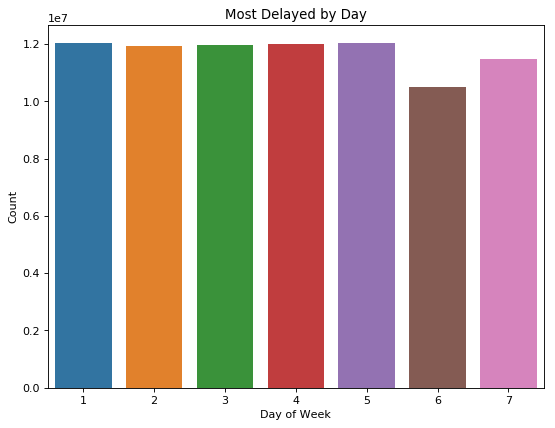

In [96]:
### Plot day
plt.figure(figsize=(8, 6), dpi=80)
sns.barplot(x='DayofWeek', y = 'count', data=delayDayCount)
plt.title('Most Delayed by Day')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

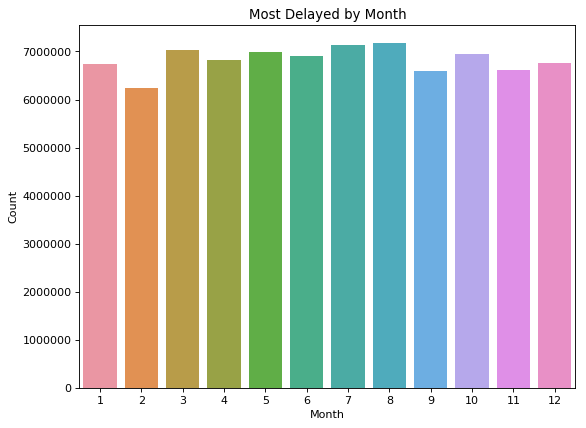

In [138]:
plt.figure(figsize=(8, 6), dpi=80)
ax2 = sns.barplot(x='Month', y = 'count', data=delayMonthCount)
plt.title('Most Delayed by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

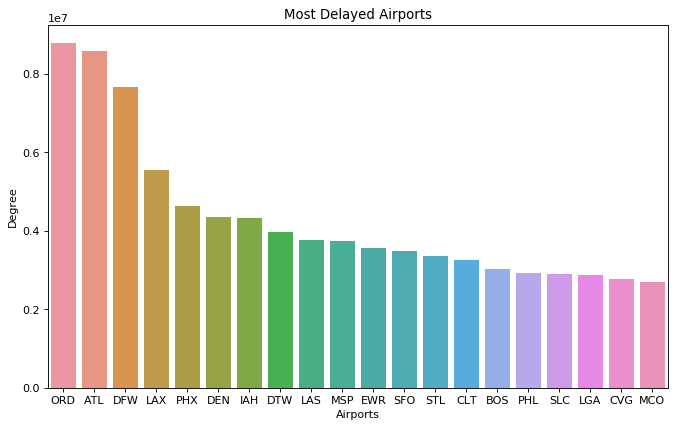

In [134]:
plt.figure(figsize=(10, 6), dpi=80)
delayAirCount_20 = delayAirCount[0:20]
ax3 = sns.barplot(x='id', y = 'degree', data=delayAirCount_20)
plt.title('Most Delayed Airports')
plt.xlabel('Airports')
plt.ylabel('Degree')
plt.show()

In [79]:
delayRouteCount['Flight Route'] = delayRouteCount['src'] + '-->' + delayRouteCount['dst']

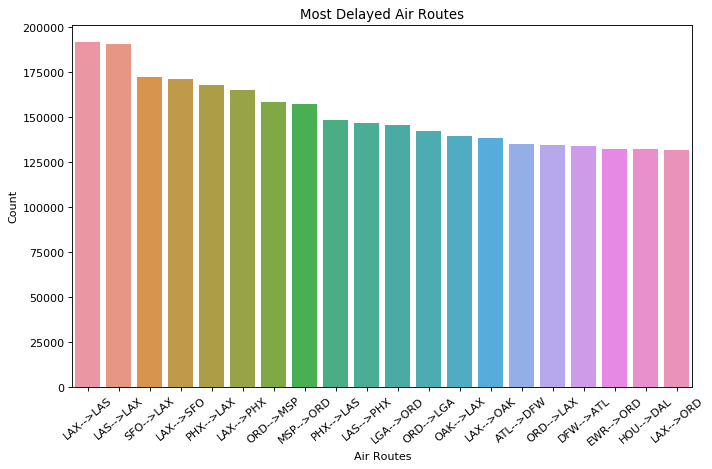

In [90]:
plt.figure(figsize=(10, 6), dpi=80)
delayRouteCount_20 = delayRouteCount[0:20]
ax4 = sns.barplot(x='Flight Route', y = 'count', data=delayRouteCount_20)
plt.xticks(rotation=40)
plt.title('Most Delayed Air Routes')
plt.xlabel('Air Routes')
plt.ylabel('Count')
plt.show()

In [99]:
delayBCount = graph_dl.edges.groupBy("Origin", 'DayofWeek').count().orderBy("count", ascending = False)

## 2004-2007

In [104]:
df_04 = df2.drop('CRSDepTime', 'CRSArrTime', 'CRSElapsedTime','TailNum', 'UniqueCarrier', 'CancellationCode')

In [105]:
df_04 = df_04.filter((df_04.Year >= 2004) & (df_04.Year <= 2007))

In [106]:
df_04 = df_04.drop('CancellationCode')

#### For all the flights taken off

In [107]:
df_04_fl = df_04.dropna(subset = ('ArrTime'))

In [108]:
df_04_fl = df_04_fl.where(df_04_fl.Cancelled == 0)

In [109]:
df_04_fl = df_04_fl.withColumn("arr_hour",expr("substring(ArrTime, 1, length(ArrTime)-4)"))
df_04_fl = df_04_fl.withColumn("arr_min",expr("substring(ArrTime, length(ArrTime)-3, 2)"))
df_04_fl = df_04_fl.withColumn("dep_hour",expr("substring(DepTime, 1, length(DepTime)-4)"))
df_04_fl = df_04_fl.withColumn("dep_min",expr("substring(DepTime, length(DepTime)-3, 2)"))

In [110]:
df_04_fl = df_04_fl.withColumn("arr_hour",df_04_fl.arr_hour.cast('int'))
df_04_fl = df_04_fl.withColumn("arr_min",df_04_fl.arr_min.cast('int'))
df_04_fl = df_04_fl.withColumn("dep_hour",df_04_fl.dep_hour.cast('int'))
df_04_fl = df_04_fl.withColumn("dep_min",df_04_fl.dep_min.cast('int'))

#### See if there is missing value

In [113]:
##missing_04 = df_04_fl.select([(count(when(isnan(c) | col(c).isNull(), c))/count(lit(1))).alias(c) for c in df_04_fl.columns])
##missing_04.toPandas()

#### Group by missing reason and see if taxi time, and Delay time differs

In [114]:
df_04_wd = df_04.filter(df_04.WeatherDelay == 1)
df_04_cd = df_04.filter(df_04.CarrierDelay == 1)
df_04_nd = df_04.filter(df_04.NASDelay == 1)
df_04_sd = df_04.filter(df_04.SecurityDelay == 1)
df_04_ld = df_04.filter(df_04.LateAircraftDelay == 1)
df_04_nod = df_04.filter((df_04.WeatherDelay == 0) & (df_04.CarrierDelay == 0) & (df_04.NASDelay == 0) & 
                         (df_04.SecurityDelay == 0) & (df_04.LateAircraftDelay == 0))

In [115]:
## Weather
wd_p = df_04_wd.agg({'DepDelay': 'mean',
              'ArrDelay': 'mean',
              'TaxiIn':'mean',
              'TaxiOut':'mean'})
wd_p.show()

+-----------------+----------------+-----------------+------------------+
|    avg(DepDelay)|     avg(TaxiIn)|    avg(ArrDelay)|      avg(TaxiOut)|
+-----------------+----------------+-----------------+------------------+
|57.06498800959233|7.35431654676259|63.93657074340528|24.305875299760192|
+-----------------+----------------+-----------------+------------------+



In [116]:
## Carrier
cd_p = df_04_cd.agg({'DepDelay': 'mean',
              'ArrDelay': 'mean',
              'TaxiIn':'mean',
              'TaxiOut':'mean'})
cd_p.show()

+------------------+----------------+----------------+----------------+
|     avg(DepDelay)|     avg(TaxiIn)|   avg(ArrDelay)|    avg(TaxiOut)|
+------------------+----------------+----------------+----------------+
|39.888633058652445|6.70769207464857|42.2494546776539|17.6923170140572|
+------------------+----------------+----------------+----------------+



In [117]:
## NAS
nd_p = df_04_nd.agg({'DepDelay': 'mean',
              'ArrDelay': 'mean',
              'TaxiIn':'mean',
              'TaxiOut':'mean'})
nd_p.show()

+------------------+----------------+-----------------+------------------+
|     avg(DepDelay)|     avg(TaxiIn)|    avg(ArrDelay)|      avg(TaxiOut)|
+------------------+----------------+-----------------+------------------+
|49.861431719503415|8.92202852384381|50.14927381290046|16.403210205165127|
+------------------+----------------+-----------------+------------------+



In [118]:
## Security
sd_p = df_04_sd.agg({'DepDelay': 'mean',
              'ArrDelay': 'mean',
              'TaxiIn':'mean',
              'TaxiOut':'mean'})
sd_p.show()

+-----------------+-----------------+-----------------+------------------+
|    avg(DepDelay)|      avg(TaxiIn)|    avg(ArrDelay)|      avg(TaxiOut)|
+-----------------+-----------------+-----------------+------------------+
|37.10671936758893|6.709486166007905|40.16897233201581|17.599802371541504|
+-----------------+-----------------+-----------------+------------------+



In [119]:
## LateAircraft
ld_p = df_04_ld.agg({'DepDelay': 'mean',
              'ArrDelay': 'mean',
              'TaxiIn':'mean',
              'TaxiOut':'mean'})
ld_p.show()

+-----------------+-----------------+-----------------+------------------+
|    avg(DepDelay)|      avg(TaxiIn)|    avg(ArrDelay)|      avg(TaxiOut)|
+-----------------+-----------------+-----------------+------------------+
|35.80901302030628|7.178270255683735|43.11583350199015|22.094245429400257|
+-----------------+-----------------+-----------------+------------------+



In [120]:
## No Delay
nod_p = df_04_nod.agg({'DepDelay': 'mean',
              'ArrDelay': 'mean',
              'TaxiIn':'mean',
              'TaxiOut':'mean'})
nod_p.show()

+-------------------+-----------------+------------------+------------------+
|      avg(DepDelay)|      avg(TaxiIn)|     avg(ArrDelay)|      avg(TaxiOut)|
+-------------------+-----------------+------------------+------------------+
|-0.5984602617517774|6.511174939679565|-4.876161144288542|13.897128689653522|
+-------------------+-----------------+------------------+------------------+



#### Rename Dataframes

In [145]:
from functools import reduce

oldColumns = nod_p.schema.names
newColumns = ["Dep", "TaxiIn", "Arr", "TaxiOut"]

In [146]:
nod = reduce(lambda nod_p, idx: nod_p.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), nod_p)
nod.printSchema()
nod = nod.toPandas()

root
 |-- Dep: double (nullable = true)
 |-- TaxiIn: double (nullable = true)
 |-- Arr: double (nullable = true)
 |-- TaxiOut: double (nullable = true)



In [147]:
nd = reduce(lambda nd_p, idx: nd_p.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), nd_p)
nd.printSchema()
nd = nd.toPandas()

root
 |-- Dep: double (nullable = true)
 |-- TaxiIn: double (nullable = true)
 |-- Arr: double (nullable = true)
 |-- TaxiOut: double (nullable = true)



In [148]:
wd = reduce(lambda wd_p, idx: wd_p.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), wd_p)
wd.printSchema()
wd = wd.toPandas()

root
 |-- Dep: double (nullable = true)
 |-- TaxiIn: double (nullable = true)
 |-- Arr: double (nullable = true)
 |-- TaxiOut: double (nullable = true)



In [149]:
ld = reduce(lambda ld_p, idx: ld_p.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), ld_p)
ld.printSchema()
ld = ld.toPandas()

root
 |-- Dep: double (nullable = true)
 |-- TaxiIn: double (nullable = true)
 |-- Arr: double (nullable = true)
 |-- TaxiOut: double (nullable = true)



In [150]:
sd = reduce(lambda sd_p, idx: sd_p.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), sd_p)
sd.printSchema()
sd = sd.toPandas()

root
 |-- Dep: double (nullable = true)
 |-- TaxiIn: double (nullable = true)
 |-- Arr: double (nullable = true)
 |-- TaxiOut: double (nullable = true)



In [151]:
cd = reduce(lambda cd_p, idx: cd_p.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), cd_p)
cd.printSchema()
cd = cd.toPandas()

root
 |-- Dep: double (nullable = true)
 |-- TaxiIn: double (nullable = true)
 |-- Arr: double (nullable = true)
 |-- TaxiOut: double (nullable = true)



In [152]:
summ = pd.concat([cd, wd, sd, ld, nd, nod], axis = 0)

In [153]:
summ.insert(4, "DelayReason", ['Carrier Delay', 'Weather Delay', 'Security Delay', 'Late Aircraft Delay', 
                               'NAS Delay', 'No Delay'], True)

In [154]:
summ_mt = summ.reset_index()
summ_mt = summ_mt.melt(id_vars='DelayReason')

In [155]:
summ_mt = summ_mt.loc[summ_mt['value'] != 0]

In [156]:
summ_mt

,DelayReason,variable,value
6,Carrier Delay,Dep,39.888633
7,Weather Delay,Dep,57.064988
8,Security Delay,Dep,37.106719
9,Late Aircraft Delay,Dep,35.809013
10,NAS Delay,Dep,49.861432
11,No Delay,Dep,-0.598460
12,Carrier Delay,TaxiIn,6.707692
13,Weather Delay,TaxiIn,7.354317
14,Security Delay,TaxiIn,6.709486
15,Late Aircraft Delay,TaxiIn,7.178270


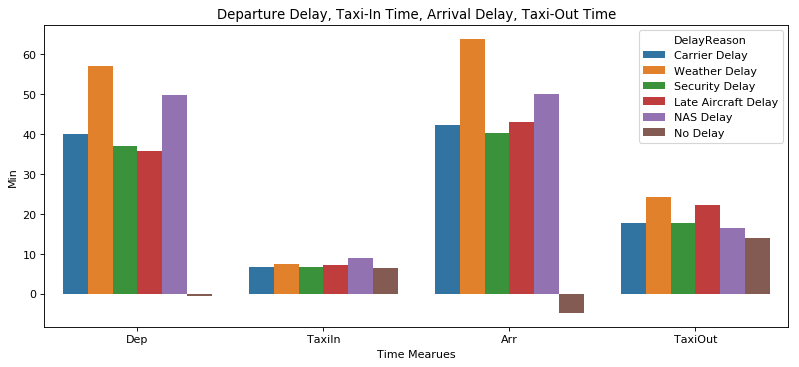

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5), dpi=80)
ax = sns.barplot(x="variable", y="value", hue="DelayReason", data=summ_mt)
plt.title('Departure Delay, Taxi-In Time, Arrival Delay, Taxi-Out Time')
plt.xlabel('Time Mearues')
plt.ylabel('Min')
plt.show()